Download Github repo.

In [2]:
!git clone https://github.com/NVlabs/stylegan2.git

Cloning into 'stylegan2'...
remote: Enumerating objects: 122, done.
remote: Total 122 (delta 0), reused 0 (delta 0), pack-reused 122
Receiving objects: 100% (122/122), 590.59 KiB | 31.08 MiB/s, done.
Resolving deltas: 100% (55/55), done.


Check GPU and CPU are working. If you get an error after "CPU says hello." output try turning on GPU runtime: Runtime > Change runtime type, and set the runtime to GPU.

In [3]:
!cd stylegan2 && nvcc test_nvcc.cu -o test_nvcc -run

CPU says hello.
GPU says hello.


Install dependencies.

In [4]:
!pip install tensorflow==1.14
!pip install tensorflow-gpu==1.14
!pip install numpy==1.14.3

     |████████████████████████████████| 109.2MB 37kB/s 
     |████████████████████████████████| 51kB 9.5MB/s 
     |████████████████████████████████| 3.2MB 57.2MB/s 
     |████████████████████████████████| 491kB 55.9MB/s 
  Found existing installation: tensorboard 2.4.0
    Uninstalling tensorboard-2.4.0:
      Successfully uninstalled tensorboard-2.4.0
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.0
    Uninstalling tensorflow-2.4.0:
      Successfully uninstalled tensorflow-2.4.0
     |████████████████████████████████| 377.0MB 45kB/s 
     |████████████████████████████████| 12.2MB 12.2MB/s 
ERROR: xarray 0.15.1 has requirement numpy>=1.15, but you'll have numpy 1.14.3 which is incompatible.
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.14.3 which is incompatible.
ERROR: tifffile 2020.9.3 has req

Run command to generate images.
Results at /content/stylegan2/results

In [5]:
!cd stylegan2 && python run_generator.py generate-images --network=gdrive:networks/stylegan2-ffhq-config-f.pkl \
  --seeds=66,230,389,1518 --truncation-psi=1.0

Local submit - run_dir: results/00000-generate-images
dnnlib: Running run_generator.generate_images() on localhost...
Loading networks from "gdrive:networks/stylegan2-ffhq-config-f.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Compiling... Loading... Done.
Generating image for seed 66 (0/4) ...
Generating image for seed 230 (1/4) ...
Generating image for seed 389 (2/4) ...
Generating image for seed 1518 (3/4) ...
dnnlib: Finished run_generator.generate_images() in 55s.


Run this cell to see latest reults. To download the images individually and in higher resolutions go to /content/stylegan2/results

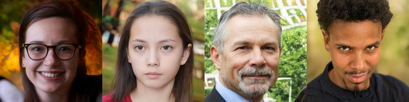

In [6]:
import os
from IPython.display import Image, display
import sys
from PIL import Image

imageDirec = []

for direc in [x[0] for x in os.walk('/content/stylegan2/results/')]:
  if 'generate-images' in direc:
    imageDirec.append(direc)

imageDirec.sort()

allImagePaths = []

for subdir, dirs, files in os.walk(imageDirec[-1]):
    for file in files:
        ext = os.path.splitext(file)[-1].lower()
        if ext == '.png':
            allImagePaths.append(imageDirec[-1] + '/' + file)

images = [Image.open(x) for x in allImagePaths]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
  new_im.paste(im, (x_offset,0))
  x_offset += im.size[0]

new_im = new_im.resize((int(sum(widths)/10), int(max(heights)/10)))

display(new_im)